# Relatório - Análise Exploratória

Gabriel Eugenio Brito, Renan de Souza Antunes, Aurélio Vinicius Cabral Funes

## Descrição das fontes de dados

Os dados utilizados são provenientes da Polícia Rodoviária Federal, e estão disponíveis em https://www.prf.gov.br/portal/dados-abertos/acidentes. Eles consistem em uma série de arquivos csv com informações referentes a acidentes ocorridos do ano de 2007 em diante. Optamos por usar apenas os dados de 2018, mas se for  necessário podemos utilizar dados de outros anos para fazer um comparativo.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('acidentes2018.csv', sep=';', encoding='latin-1')

A princípio pensamos que cada linha do csv tivesse informações relativas a um acidente, mas após olhar com mais cuidado percebemos que existem várias linhas com o mesmo id. Também temos colunas como "idade", "sexo" e "estado_fisico", que não fazem sentido quando estamos falando de um acidente.

Acontece que cada linha representa __uma pessoa envolvida__ em um acidente. Então se um acidente envolveu, digamos, 5 pessoas, haverão 5 linhas referentes a este acidente no csv. Podemos ver que há uma certa redundância nos dados, pois algumas das informações como o horário e o local do acidente são as mesmas para todos os envolvidos.

In [3]:
# Raw data
pd.set_option('display.max_columns', None) # None = mostra todas

print(df.columns)
df.head()

Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br',
       'km', 'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'id_veiculo', 'tipo_veiculo', 'marca', 'ano_fabricacao_veiculo',
       'tipo_envolvido', 'estado_fisico', 'idade', 'sexo', 'ilesos',
       'feridos_leves', 'feridos_graves', 'mortos', 'latitude', 'longitude',
       'regional', 'delegacia', 'uop'],
      dtype='object')


,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,99973.0,216524.0,2018-01-01,segunda-feira,00:20:00,RJ,116.0,"303,5",RESENDE,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Múltipla,Reta,Sim,177708,Automóvel,GM/OPALA COMODORO SL,1988.0,Passageiro,Lesões Graves,59.0,Feminino,0,0,1,0,-22.46937,-44.44705,SR-RJ,DEL5/7,UOP03/RJ
1,99973.0,216530.0,2018-01-01,segunda-feira,00:20:00,RJ,116.0,"303,5",RESENDE,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Múltipla,Reta,Sim,177708,Automóvel,GM/OPALA COMODORO SL,1988.0,Passageiro,Lesões Graves,15.0,Masculino,0,0,1,0,-22.46937,-44.44705,SR-RJ,DEL5/7,UOP03/RJ
2,99973.0,216523.0,2018-01-01,segunda-feira,00:20:00,RJ,116.0,"303,5",RESENDE,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Múltipla,Reta,Sim,177708,Automóvel,GM/OPALA COMODORO SL,1988.0,Condutor,Lesões Graves,58.0,Masculino,0,0,1,0,-22.46937,-44.44705,SR-RJ,DEL5/7,UOP03/RJ
3,99973.0,216527.0,2018-01-01,segunda-feira,00:20:00,RJ,116.0,"303,5",RESENDE,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Múltipla,Reta,Sim,177708,Automóvel,GM/OPALA COMODORO SL,1988.0,Passageiro,Lesões Graves,9.0,Feminino,0,0,1,0,-22.46937,-44.44705,SR-RJ,DEL5/7,UOP03/RJ
4,99973.0,216532.0,2018-01-01,segunda-feira,00:20:00,RJ,116.0,"303,5",RESENDE,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Múltipla,Reta,Sim,177708,Automóvel,GM/OPALA COMODORO SL,1988.0,Passageiro,Ileso,9.0,Masculino,1,0,0,0,-22.46937,-44.44705,SR-RJ,DEL5/7,UOP03/RJ


As features incluem, entre outras informações:

* __Causa do acidente__: como por exemplo "Defeito Mecânico no Veículo" e "Falta de Atenção à Condução".
* __Tipo do acidente__: como "Capotamento" ou "Colisão traseira".
* __Local onde aconteceu__: município, BR, km e até mesmo a latitude e longitude de onde aconteceu.
* __Condição meteorológica__: como estava o clima no momento do acidente.
* __Estado físico dos envolvidos__: classificados em "ilesos", "feridos leves", "feridos graves" e "mortos".
* __Tipo do veículo__: automóvel, motocicleta, etc

Optamos por descartar os dados específicos dos envolvidos, e manter apenas as informações relativas ao acidente e aos veículos.

In [4]:
# Agrupa os dados por acidente
grouped_by_accident = df.groupby('id')

# Se o acidente é o mesmo, essas informações vão ser iguais pra todas as linhas daquele acidente
accident_data = grouped_by_accident[
    'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km', 'municipio',
    'causa_acidente', 'tipo_acidente', 'classificacao_acidente', 'fase_dia',
    'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via',
    'uso_solo', 'latitude', 'longitude', 'regional', 'delegacia', 'uop'
].first()

# Calcula a quantidade de feridos, mortos, etc em cada acidente
accident_data['n_ilesos'] = grouped_by_accident['ilesos'].sum()
accident_data['n_feridos_leves'] = grouped_by_accident['feridos_leves'].sum()
accident_data['n_feridos_graves'] = grouped_by_accident['feridos_graves'].sum()
accident_data['n_mortos'] = grouped_by_accident['mortos'].sum()
accident_data['n_envolvidos'] = accident_data['n_ilesos'] + accident_data['n_feridos_leves'] + accident_data['n_feridos_graves'] + accident_data['n_mortos']

accident_data.head()

,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,latitude,longitude,regional,delegacia,uop,n_ilesos,n_feridos_leves,n_feridos_graves,n_mortos,n_envolvidos
id,,,,,,,,,,,,,,,,,,,,,,,,,,
99973.0,2018-01-01,segunda-feira,00:20:00,RJ,116.0,"303,5",RESENDE,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Múltipla,Reta,Sim,-22.469370,-44.447050,SR-RJ,DEL5/7,UOP03/RJ,1,0,4,0,5
99976.0,2018-01-01,segunda-feira,00:40:00,SC,282.0,"0,4",FLORIANOPOLIS,Não guardar distância de segurança,Colisão traseira,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Dupla,Reta,Sim,-27.599717,-48.575657,SR-SC,DEL8/1,UOP01/SC,1,0,2,0,3
99977.0,2018-01-01,segunda-feira,00:30:00,RJ,493.0,1,ITABORAI,Ultrapassagem Indevida,Colisão frontal,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Simples,Curva,Não,-22.763901,-42.927532,SR-RJ,DEL5/4,UOP02/RJ,3,1,0,0,4
99981.0,2018-01-01,segunda-feira,01:15:00,RS,386.0,134,SARANDI,Ingestão de Álcool,Colisão transversal,Sem Vítimas,Pleno dia,Crescente,Céu Claro,Simples,Interseção de vias,Não,-27.953636,-52.916374,SR-RS,DEL9/14,UOP01/RS,2,0,0,0,2
99982.0,2018-01-01,segunda-feira,00:20:00,RS,293.0,"151,7",CANDIOTA,Falta de Atenção à Condução,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Simples,Reta,Não,-31.395214,-53.783912,SR-RS,DEL9/11,UOP03/RS,0,0,1,0,1


In [5]:
# Agrupa os dados por veículo
grouped_by_vehicle = df.groupby('id_veiculo')

vehicle_data = grouped_by_vehicle[
    'tipo_veiculo', 'ano_fabricacao_veiculo', 'causa_acidente'
].first()

# Calcula a quantidade de feridos, mortos, etc em cada veículo
vehicle_data['n_ilesos'] = grouped_by_vehicle['ilesos'].sum()
vehicle_data['n_feridos_leves'] = grouped_by_vehicle['feridos_leves'].sum()
vehicle_data['n_feridos_graves'] = grouped_by_vehicle['feridos_graves'].sum()
vehicle_data['n_mortos'] = grouped_by_vehicle['mortos'].sum()
vehicle_data['n_envolvidos'] = vehicle_data['n_ilesos'] + vehicle_data['n_feridos_leves'] + vehicle_data['n_feridos_graves'] + vehicle_data['n_mortos']

vehicle_data.head()

,tipo_veiculo,ano_fabricacao_veiculo,causa_acidente,n_ilesos,n_feridos_leves,n_feridos_graves,n_mortos,n_envolvidos
id_veiculo,,,,,,,,
177629,Motocicleta,2017.0,Não guardar distância de segurança,0,0,2,0,2
177630,Automóvel,2010.0,Não guardar distância de segurança,1,0,0,0,1
177642,Camioneta,2015.0,Animais na Pista,1,0,0,0,1
177645,Caminhonete,2007.0,Ingestão de Álcool,1,0,0,0,1
177646,Automóvel,2012.0,Ingestão de Álcool,1,0,0,0,1


## Análises inciais de distribuição e/ou correlação

A partir destes dados podemos construir diversos gráficos que mostram informações como a principal causa, o tipo mais comum, o estado e a BR com maior número de acidentes.

In [6]:
# Algumas estatísticas
accident_data.describe()

,br,latitude,longitude,n_ilesos,n_feridos_leves,n_feridos_graves,n_mortos,n_envolvidos
count,69092.000000,69206.000000,69206.000000,69206.000000,69206.000000,69206.000000,69206.000000,69206.000000
mean,215.258974,-18.696301,-46.652405,1.066569,0.850866,0.254891,0.076135,2.248461
std,130.654539,7.875188,6.189804,1.482661,1.105815,0.607823,0.324646,1.921826
min,10.000000,-33.689819,-70.744728,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.000000,-25.273954,-50.218570,0.000000,0.000000,0.000000,0.000000,1.000000
50%,163.000000,-20.337180,-47.838150,1.000000,1.000000,0.000000,0.000000,2.000000
75%,343.000000,-12.509536,-42.643336,1.000000,1.000000,0.000000,0.000000,3.000000
max,498.000000,4.428241,-34.827690,56.000000,58.000000,28.000000,13.000000,80.000000


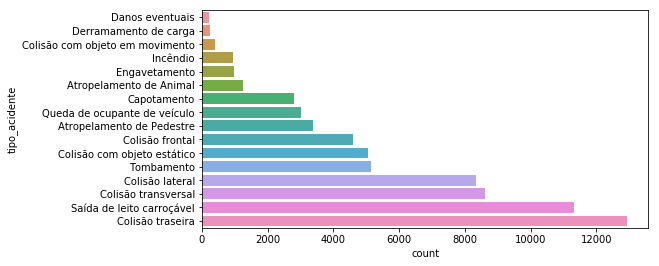

In [7]:
# Número de acidentes por tipo
plt.figure(figsize=(8,4))
sns.countplot(y="tipo_acidente", data=accident_data, order=accident_data['tipo_acidente'].value_counts(ascending=True).index)

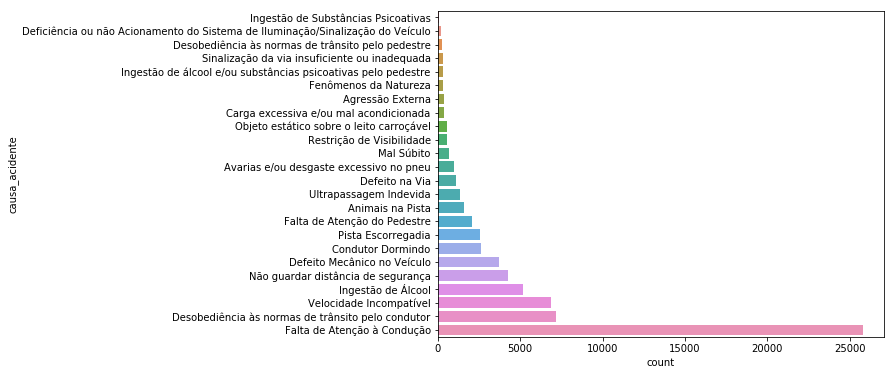

In [8]:
# Número de acidentes por causa
plt.figure(figsize=(8,6))
sns.countplot(y="causa_acidente", data=accident_data, order=accident_data['causa_acidente'].value_counts(ascending=True).index)

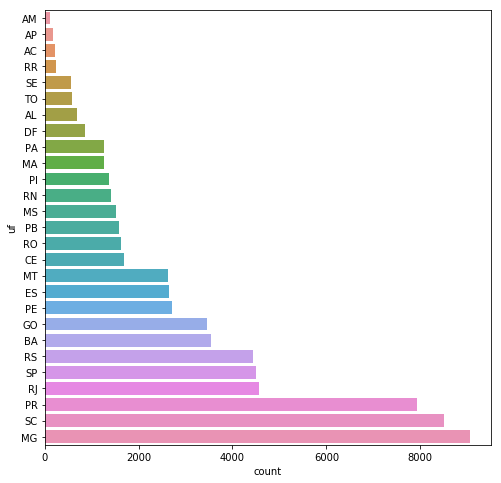

In [9]:
# Número de acidentes por estado
plt.figure(figsize=(8,8))
sns.countplot(y="uf", data=accident_data, order=accident_data['uf'].value_counts(ascending=True).index)

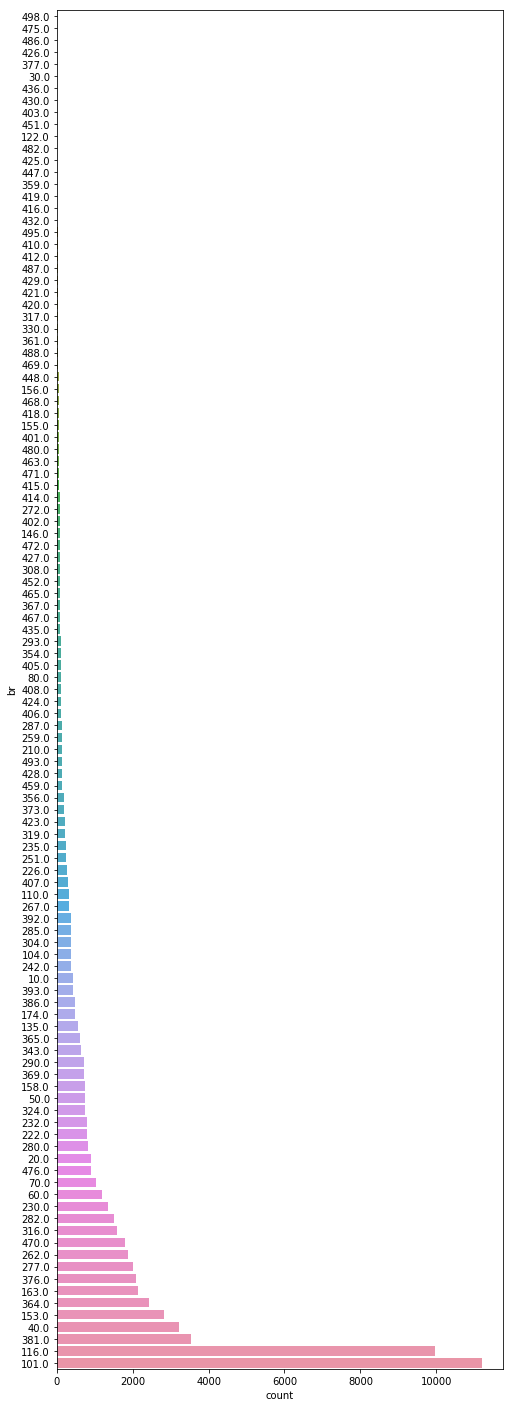

In [10]:
# Número de acidentes por BR
plt.figure(figsize=(8,25))
sns.countplot(y="br", data=accident_data, order=accident_data['br'].value_counts(ascending=True).index)

Também podemos ver a distribuição dos acidentes no decorrer do tempo, o que mostra os períodos com maior número de acidentes.

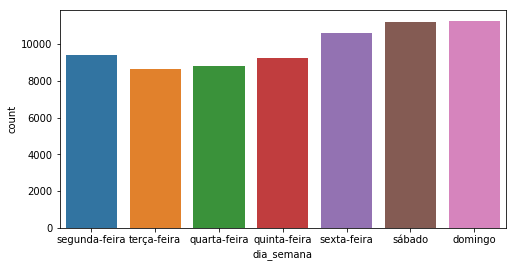

In [11]:
# Número de acidentes por dia da semana
plt.figure(figsize=(8,4))
sns.countplot(x="dia_semana", data=accident_data)

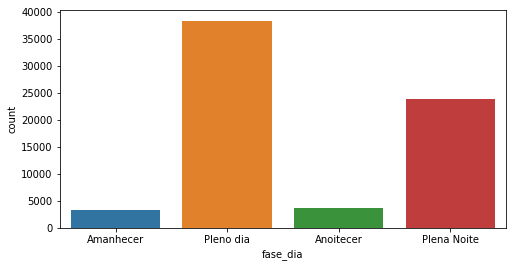

In [12]:
# Número de acidentes por fase do dia
plt.figure(figsize=(8,4))
sns.countplot(x="fase_dia", data=accident_data, order=['Amanhecer', 'Pleno dia', 'Anoitecer', 'Plena Noite'])

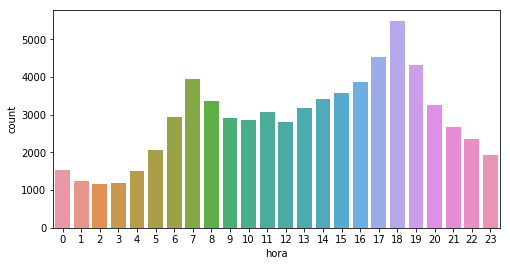

In [13]:
# Número de acidentes por hora
tmp = pd.DataFrame()
tmp['hora'] = pd.to_datetime(accident_data['horario']).dt.hour

plt.figure(figsize=(8, 4))
sns.countplot(x='hora', data=tmp)

/home/eragon/.local/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


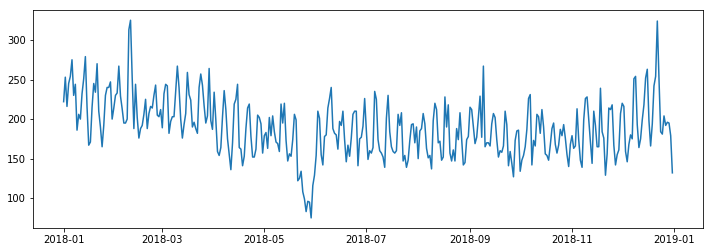

In [14]:
# Número de acidentes no decorrer do ano (série temporal)

# Já é pra estar ordenado no dataset, mas só pra garantir
accident_data['data_inversa'] = pd.to_datetime(accident_data['data_inversa'])
accident_data.sort_values(by='data_inversa')

plt.figure(figsize=(12, 4))
sns.lineplot(data=accident_data.groupby('data_inversa').size())

A seguir podemos ver que, contrariando as expectativas, a maior parte dos acidentes não ocorre quando está chovendo, mas sim quando o clima é de céu claro.

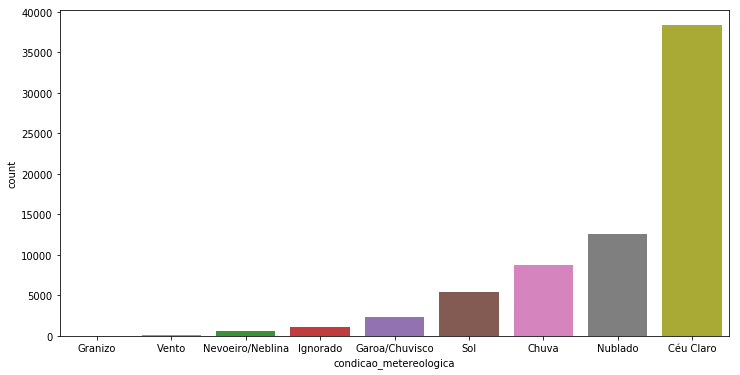

In [15]:
# Número de acidentes por clima
plt.figure(figsize=(12,6))
sns.countplot(x="condicao_metereologica", data=accident_data, order=accident_data['condicao_metereologica'].value_counts(ascending=True).index)

Não é nenhuma surpresa que automóveis estão envolvidos na maior parte dos acidentes.

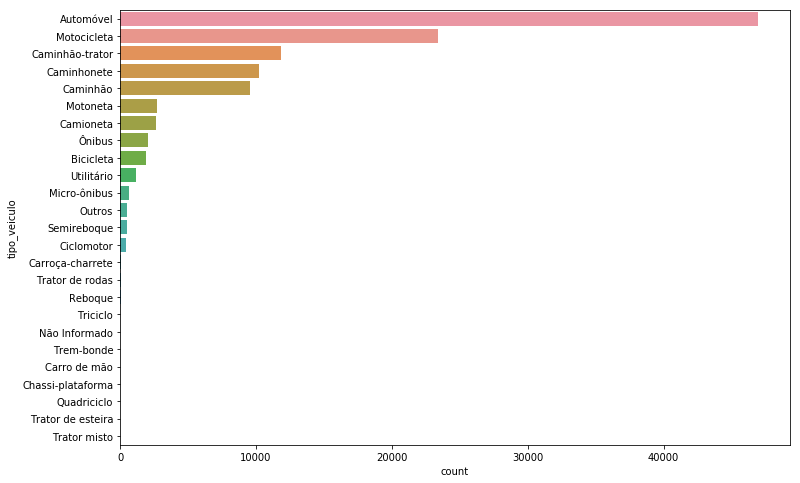

In [16]:
# Acidentes por tipo de veiculo
plt.figure(figsize=(12,8))
sns.countplot(y="tipo_veiculo", data=vehicle_data, order=vehicle_data['tipo_veiculo'].value_counts().index)

Uma questão que seria interessante explorar é se os carros mais novos são mais seguros, mas não temos dados suficientes para responder isso.

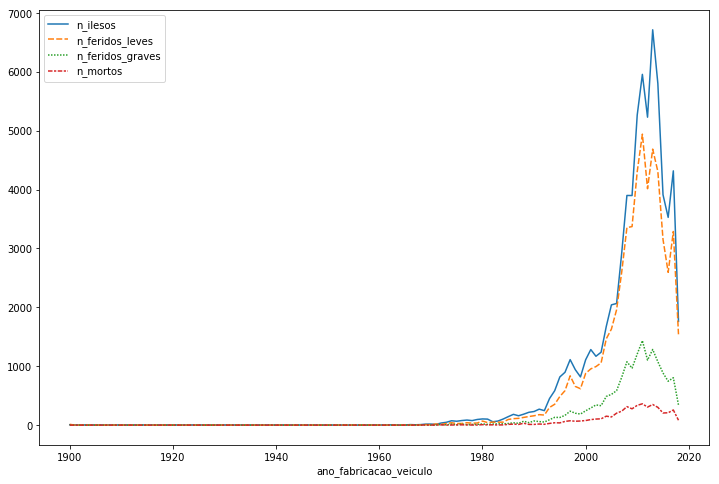

In [17]:
# Número de mortos x ilesos x feridos graves x feridos leves por ano do veículo
plt.figure(figsize=(12,8))
sns.lineplot(data=vehicle_data.groupby('ano_fabricacao_veiculo')['n_ilesos', 'n_feridos_leves', 'n_feridos_graves', 'n_mortos'].agg('sum'))